In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('cereal.csv')

# Display the first few rows
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
# Check for missing values
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [4]:
# Summary statistics
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


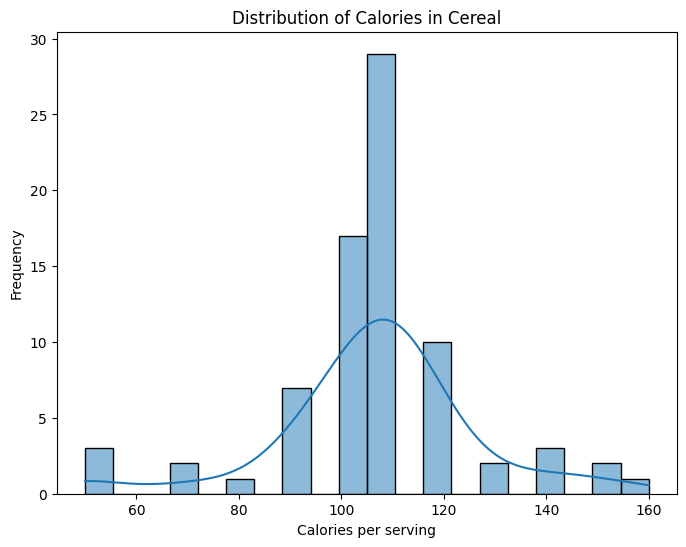

In [5]:
# Plot the distribution of calories
plt.figure(figsize=(8,6))
sns.histplot(df['calories'], kde=True, bins=20)
plt.title('Distribution of Calories in Cereal')
plt.xlabel('Calories per serving')
plt.ylabel('Frequency')
plt.show()

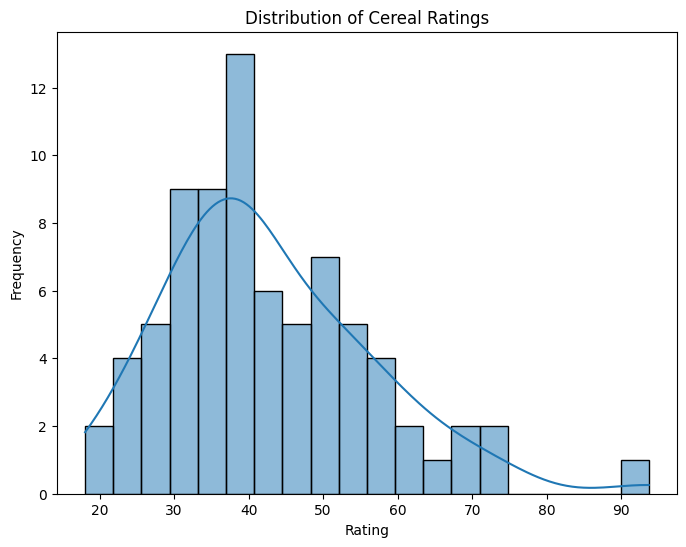

In [6]:
# Plot the distribution of cereal ratings
plt.figure(figsize=(8,6))
sns.histplot(df['rating'], kde=True, bins=20)
plt.title('Distribution of Cereal Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

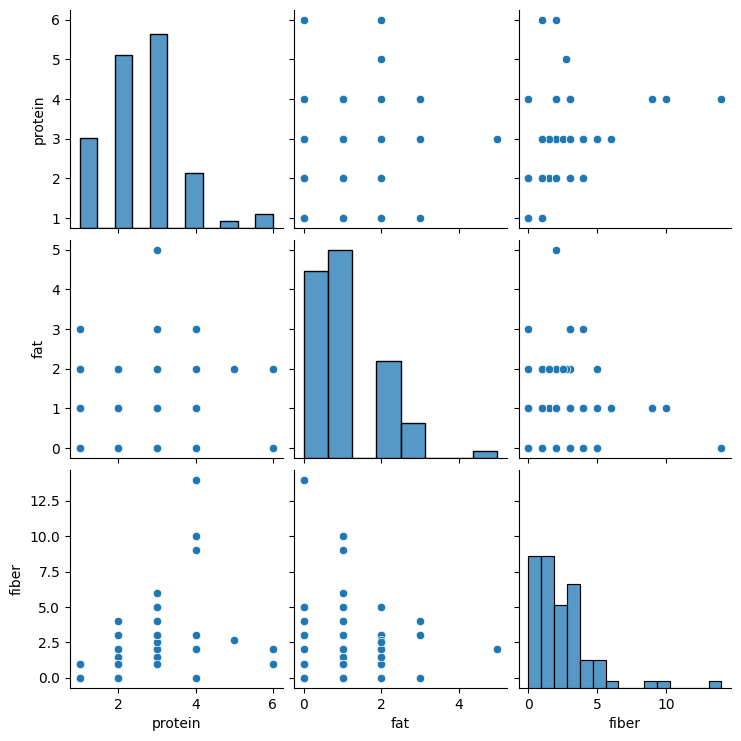

In [7]:
# Pairplot for protein, fat, and fiber
sns.pairplot(df[['protein', 'fat', 'fiber']])
plt.show()


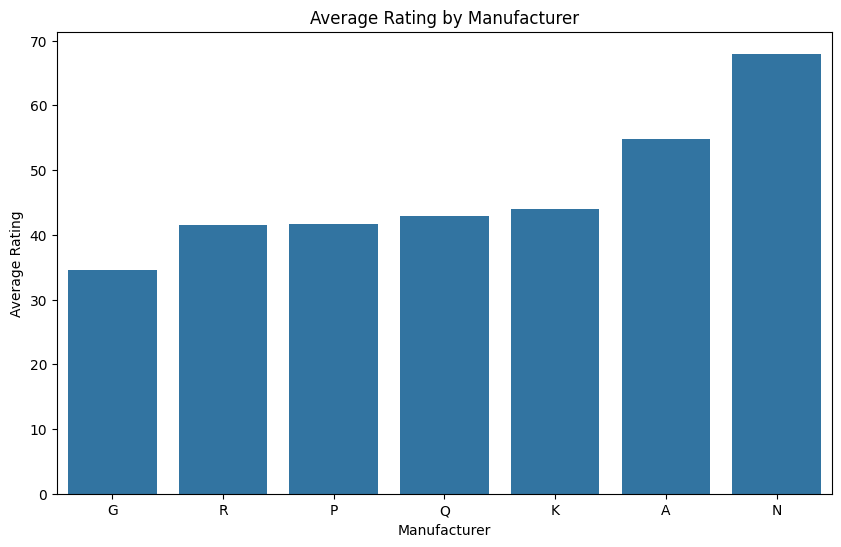

In [8]:
# Average rating per manufacturer
mfr_rating = df.groupby('mfr')['rating'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=mfr_rating.index, y=mfr_rating.values)
plt.title('Average Rating by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Rating')
plt.show()

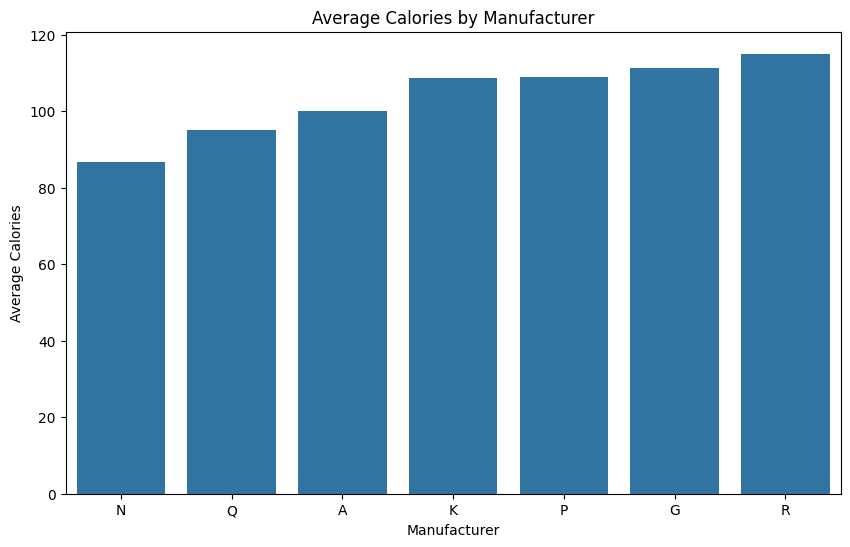

In [9]:
# Average calories per manufacturer
mfr_calories = df.groupby('mfr')['calories'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=mfr_calories.index, y=mfr_calories.values)
plt.title('Average Calories by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Calories')
plt.show()

In [10]:
# Sort cereals by sugar content
high_sugar = df.sort_values('sugars', ascending=False)[['name', 'sugars', 'calories', 'rating']].head(10)

print(high_sugar)

                     name  sugars  calories     rating
66                 Smacks      15       110  31.230054
30           Golden Crisp      15       100  35.252444
70      Total Raisin Bran      14       140  28.592785
52  Post Nat. Raisin Bran      14       120  37.840594
6             Apple Jacks      14       110  33.174094
46   Mueslix Crispy Blend      13       160  30.313351
18          Count Chocula      13       110  22.396513
24            Froot Loops      13       110  32.207582
14            Cocoa Puffs      13       110  22.736446
28          Fruitful Bran      12       120  41.015492


In [11]:
# Define the healthiest cereals as those with low calories, high fiber, and low sugars
healthy_cereals = df[(df['calories'] < df['calories'].mean()) & 
                     (df['fiber'] > df['fiber'].mean()) & 
                     (df['sugars'] < df['sugars'].mean())].sort_values('rating', ascending=False)

print(healthy_cereals[['name', 'calories', 'fiber', 'sugars', 'rating']].head(10))


                         name  calories  fiber  sugars     rating
3   All-Bran with Extra Fiber        50   14.0       0  93.704912
64     Shredded Wheat 'n'Bran        90    4.0       0  74.472949
65  Shredded Wheat spoon size        90    3.0       0  72.801787
0                   100% Bran        70   10.0       6  68.402973
63             Shredded Wheat        80    3.0       0  68.235885
50          Nutri-grain Wheat        90    3.0       2  59.642837
2                    All-Bran        70    9.0       5  59.425505
68    Strawberry Fruit Wheats        90    3.0       5  59.363993
9                 Bran Flakes        90    5.0       5  53.313813
32          Grape Nuts Flakes       100    3.0       5  52.076897


In [12]:
# Define the least healthy cereals as those with high calories and sugars
unhealthy_cereals = df[(df['calories'] > df['calories'].mean()) & 
                       (df['sugars'] > df['sugars'].mean())].sort_values('rating', ascending=False)

print(unhealthy_cereals[['name', 'calories', 'fiber', 'sugars', 'rating']].head(10))

                                      name  calories  fiber  sugars     rating
28                           Fruitful Bran       120    5.0      12  41.015492
27  Fruit & Fibre Dates; Walnuts; and Oats       120    5.0      10  40.917047
49               Nutri-Grain Almond-Raisin       140    3.0       7  40.692320
19                      Cracklin' Oat Bran       110    4.0       7  40.448772
13                                Clusters       110    2.0       7  40.400208
58                             Raisin Bran       120    5.0      12  39.259197
52                   Post Nat. Raisin Bran       120    6.0      14  37.840594
44        Muesli Raisins; Dates; & Almonds       150    3.0      11  37.136863
7                                  Basic 4       130    2.0       8  37.038562
39                  Just Right Fruit & Nut       140    2.0       9  36.471512


In [13]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Check the remaining columns
numeric_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


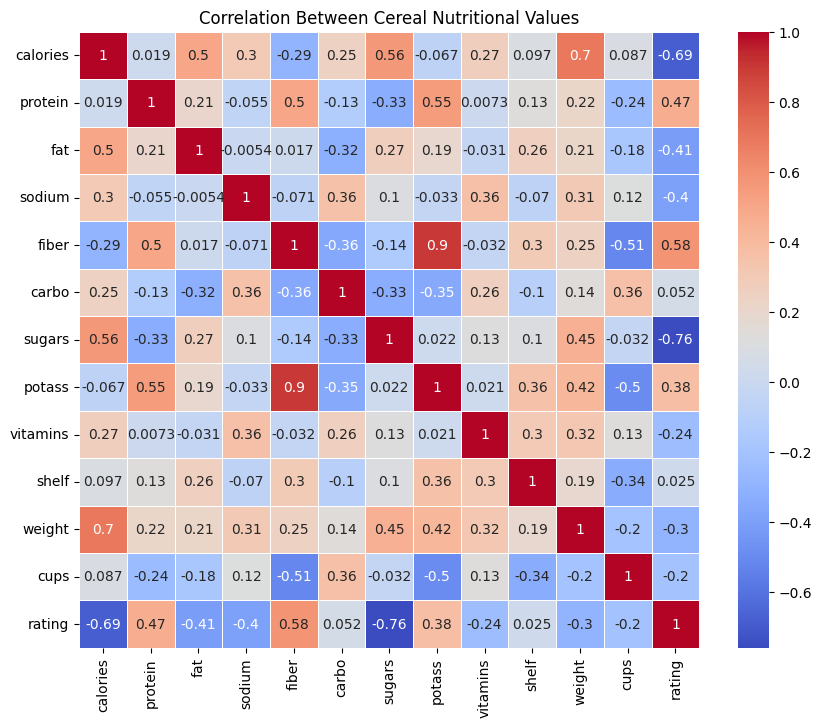

In [14]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Cereal Nutritional Values')
plt.show()

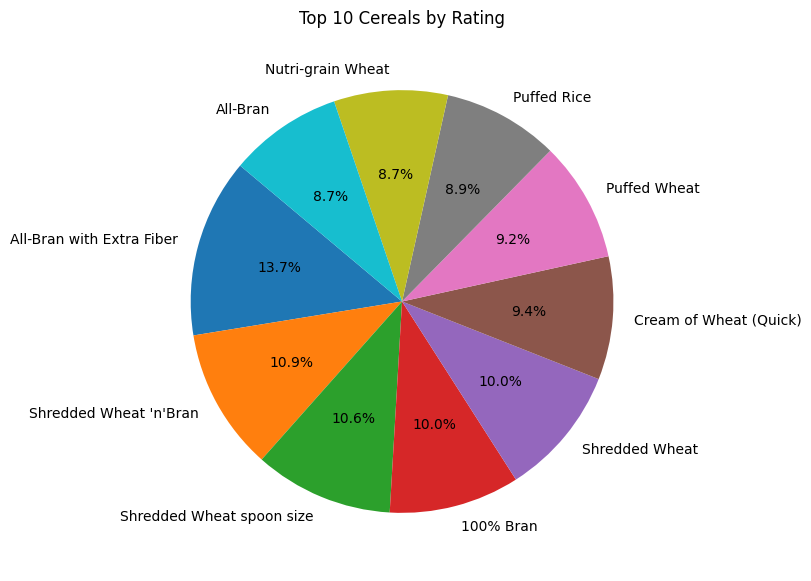

In [15]:
# For clarity, let's take the top 10 cereals based on their rating
top_cereals = df[['name', 'rating']].sort_values(by='rating', ascending=False).head(10)

# Create the pie chart
plt.figure(figsize=(6, 7))
plt.pie(top_cereals['rating'], labels=top_cereals['name'], autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Top 10 Cereals by Rating')
plt.show()

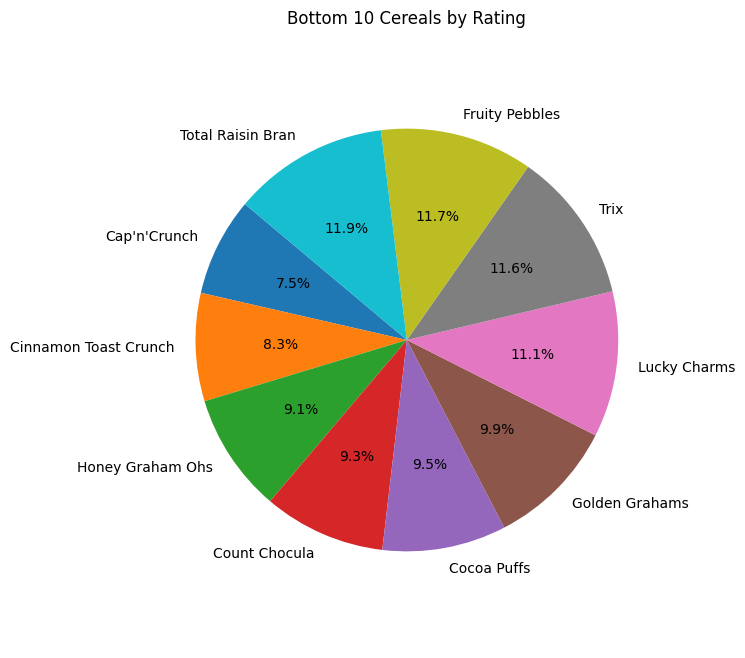

In [16]:
# For clarity, let's take the bottom 10 cereals based on their rating
low_cereals = df[['name', 'rating']].sort_values(by='rating', ascending=True).head(10)

# Create the pie chart
plt.figure(figsize=(6, 8))
plt.pie(low_cereals['rating'], labels=low_cereals['name'], autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Bottom 10 Cereals by Rating')
plt.show()

In [17]:
mfr_mapping = {
    'A': 'American Home Food Products',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}

Enter the cereal name: coco


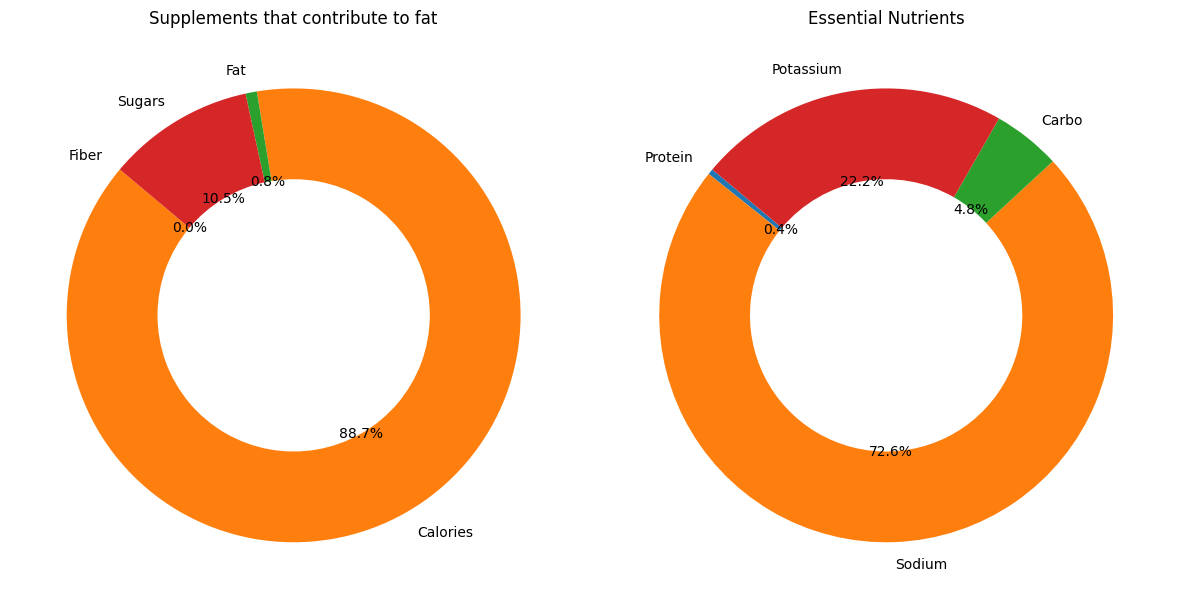

Manufacturer: General Mills
Type: C


In [18]:
def show_cereal_info(cereal_name):
    # Check if the cereal name exists in the dataset
    if not df['name'].str.contains(cereal_name, case=False).any():
        print("The cereal name is not in our list. Please reenter the name.")
        return
    
    # Filter the row of the cereal with the given name
    cereal = df[df['name'].str.contains(cereal_name, case=False)].iloc[0]
    
    # Nutritional values for the charts
    nutrition_labels1 = ['Fiber', 'Calories', 'Fat', 'Sugars']
    nutrition_values1 = [cereal['fiber'], cereal['calories'], cereal['fat'], cereal['sugars']]
    
    nutrition_labels2 = ['Protein', 'Sodium', 'Carbo', 'Potassium']
    nutrition_values2 = [cereal['protein'], cereal['sodium'], cereal['carbo'], cereal['potass']]

    # Show whether it's hot or cold
    cereal_type = cereal['type'].capitalize()  # Ensure full type is shown

    # Manufacturer full name
    manufacturer = mfr_mapping[cereal['mfr']]

    # Create first donut chart
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.pie(nutrition_values1, labels=nutrition_labels1, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
    plt.title('Supplements that contribute to fat')

    # Create second donut chart
    plt.subplot(1, 2, 2)
    plt.pie(nutrition_values2, labels=nutrition_labels2, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
    plt.title('Essential Nutrients')

    plt.tight_layout()
    plt.show()
    
    # Display additional information
    print(f"Manufacturer: {manufacturer}")
    print(f"Type: {cereal_type}")  # Print the full type

# Example of usage
while True:
    cereal_name = input("Enter the cereal name: ")
    if df['name'].str.contains(cereal_name, case=False).any():
        show_cereal_info(cereal_name)
        break
    else:
        print("The cereal name is not in our list. Please reenter the name.")


In [19]:
df['health_score'] = (df['fiber'] * 0.5) - (df['calories'] * 0.1) - (df['sugars'] * 0.2)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = df[['calories', 'protein', 'fat', 'sugars', 'fiber']]
target = df['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 18.441807837970927


In [21]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 42.560624958027475


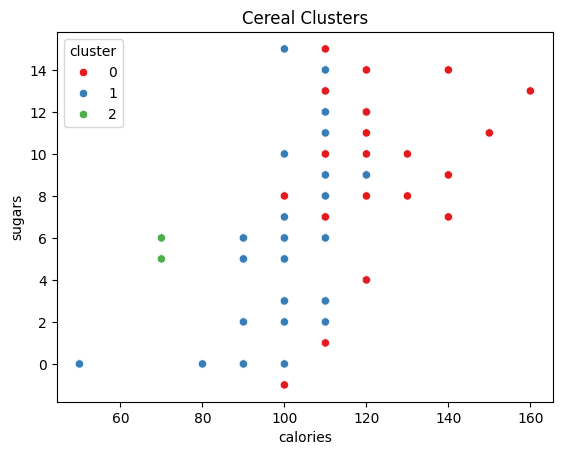

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['calories', 'sugars', 'fiber', 'protein', 'fat']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='calories', y='sugars', hue='cluster', palette='Set1')
plt.title('Cereal Clusters')
plt.show()


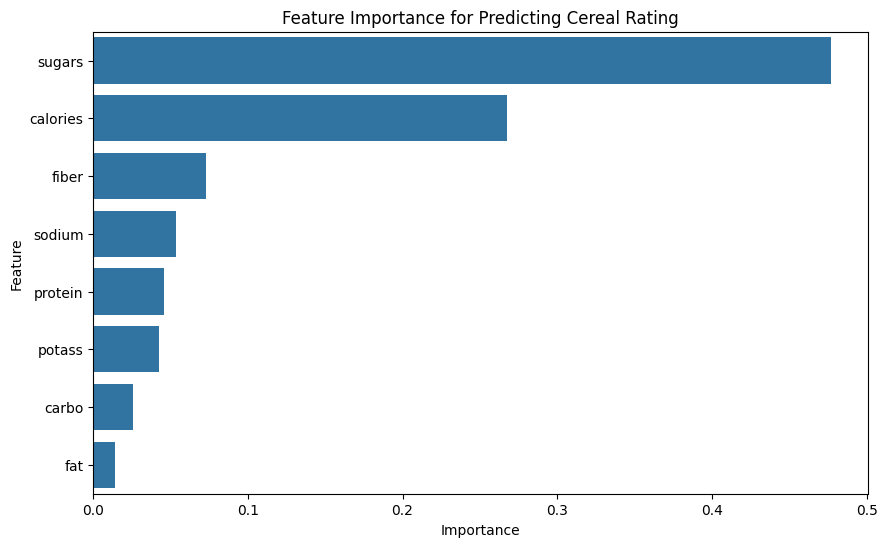

In [23]:
#Feature Importance Analysis
from sklearn.ensemble import RandomForestRegressor

features = df[['calories', 'protein', 'fat', 'sugars', 'fiber', 'sodium', 'carbo', 'potass']]
target = df['rating']

model = RandomForestRegressor()
model.fit(features, target)

importances = model.feature_importances_
feature_names = features.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Cereal Rating')
plt.show()


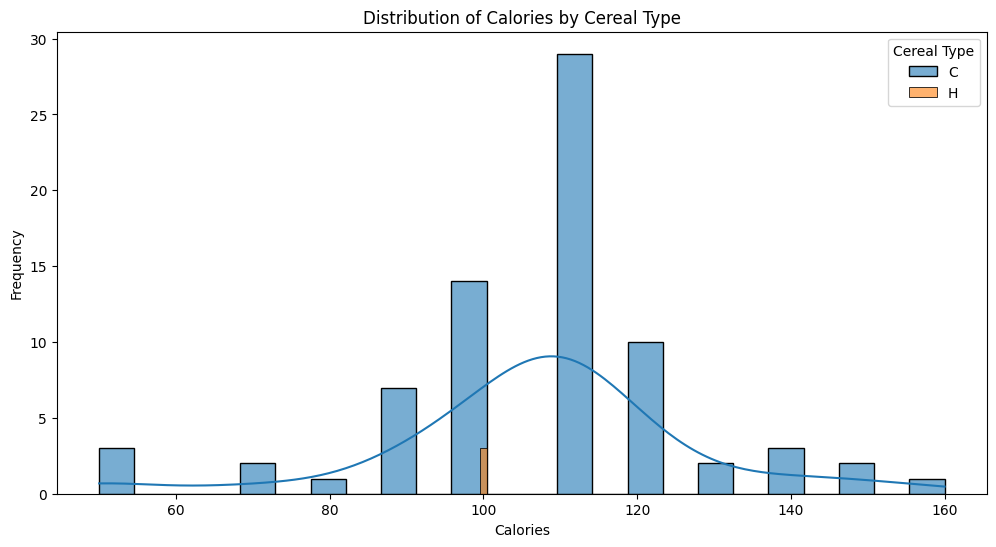

In [24]:
#Nutrition Distribution Comparison
plt.figure(figsize=(12, 6))

# Plot distribution for different types of cereals
for cereal_type in df['type'].unique():
    subset = df[df['type'] == cereal_type]
    sns.histplot(subset['calories'], kde=True, label=cereal_type, alpha=0.6)

plt.title('Distribution of Calories by Cereal Type')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.legend(title='Cereal Type')
plt.show()


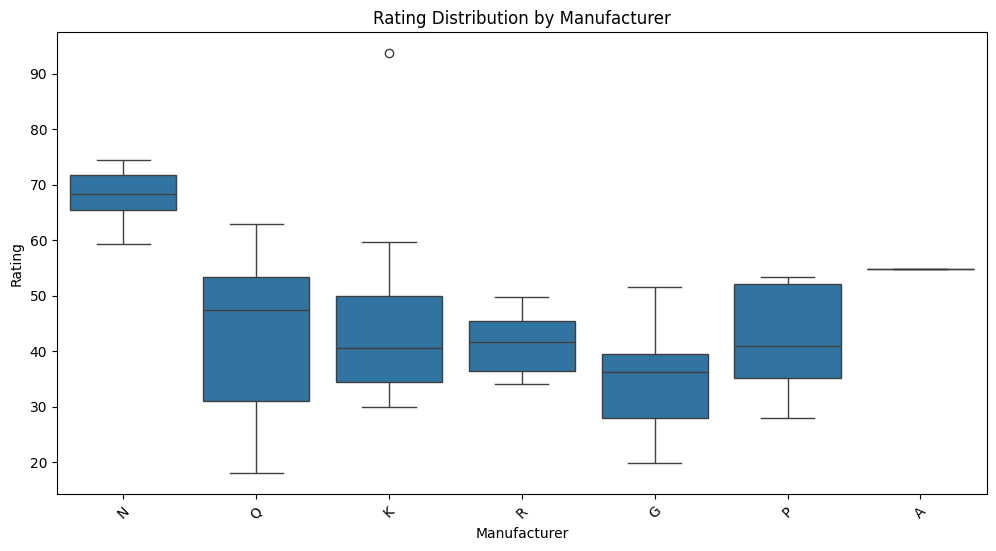

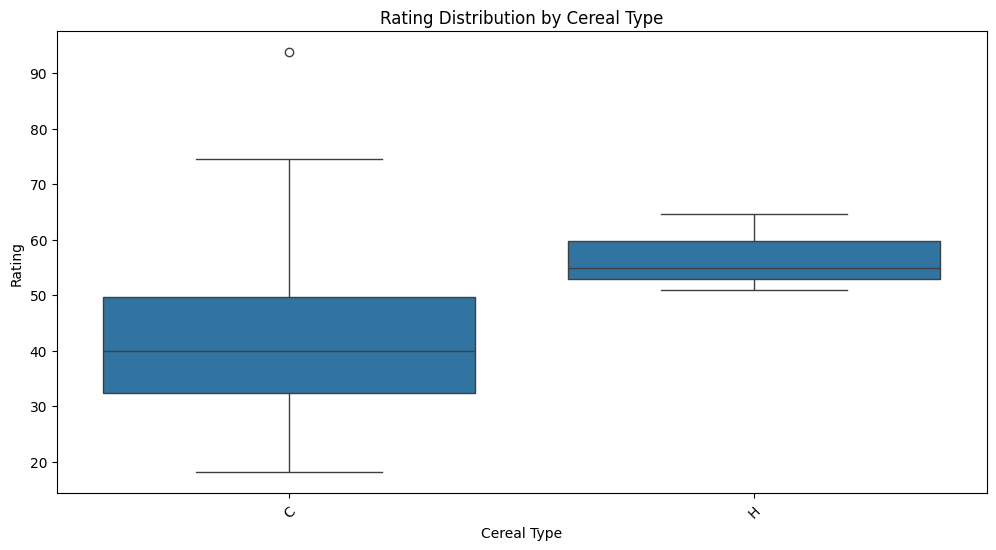

In [25]:
# Manufacturer Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='mfr', y='rating', data=df)
plt.title('Rating Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Cereal Type Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating', data=df)
plt.title('Rating Distribution by Cereal Type')
plt.xlabel('Cereal Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


In [26]:
from sklearn.neighbors import NearestNeighbors

# Define the features to be used
features = df[['calories', 'protein', 'fiber', 'sugars', 'fat']]

# Initialize and fit the model
model = NearestNeighbors(n_neighbors=5)
model.fit(features)

def find_similar_cereals(cereal_name):
    # Check if the cereal name exists in the dataset
    if not df['name'].str.contains(cereal_name, case=False).any():
        print("The cereal name is not in our list. Please reenter the name.")
        return
    
    # Get the features of the specified cereal
    cereal_features = features.loc[df['name'].str.contains(cereal_name, case=False)]
    
    # Find nearest neighbors
    distances, indices = model.kneighbors(cereal_features)
    
    # Display similar cereals
    similar_cereals = df.iloc[indices[0]]
    print(similar_cereals[['name', 'calories', 'protein', 'fiber', 'sugars', 'fat','vitamins','potass','sodium','carbo']])

# Example of user input
while True:
    cereal_name = input("Enter the cereal name: ")
    if df['name'].str.contains(cereal_name, case=False).any():
        find_similar_cereals(cereal_name)
        break
    else:
        print("The cereal name is not in our list. Please reenter the name.")

Enter the cereal name: coco
              name  calories  protein  fiber  sugars  fat  vitamins  potass  \
14     Cocoa Puffs       110        1    0.0      13    1        25      55   
18   Count Chocula       110        1    0.0      13    1        25      65   
29  Fruity Pebbles       110        1    0.0      12    1        25      25   
73            Trix       110        1    0.0      12    1        25      25   
24     Froot Loops       110        2    1.0      13    1        25      30   

    sodium  carbo  
14     180   12.0  
18     180   12.0  
29     135   13.0  
73     140   13.0  
24     125   11.0  
